https://www.worldometers.info/geography/flags-of-the-world/

http://www.lingoes.net/en/translator/langcode.htm

https://www.loc.gov/standards/iso639-2/php/code_list.php


In [1]:
from io import BytesIO

import requests
from lxml import etree
from IPython.display import display, Image
from PIL import Image as Pim

from numlenology import SUPPORTED_LANGS

# Get name by language code

Parse the table from [this web source](https://www.loc.gov/standards/iso639-2/php/code_list.php) to get language names.

In [2]:
url = "https://www.loc.gov/standards/iso639-2/php/code_list.php"
body = requests.get(url).text
tree = etree.fromstring(body, parser=etree.HTMLParser())

names = {}
for row in tree.xpath("//table[@border=1]//tr[not(@bgcolor)]"):
    if (code := row.xpath("td[2]/text()")[0].strip()):
        name = row.xpath("td[3]/text()")[0].strip()
        names[code] = name

if (nf := set(SUPPORTED_LANGS) - set(names.keys())):
    print(f"No name found for codes: {nf}")

No name found for codes: {'dk', 'cz'}


In [3]:
# manual fix.
names["dk"] = names["da"]
names["cz"] = names["cs"]

# Get and display flags

ar - Arabic


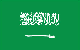


cz - Czech


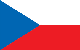


de - German


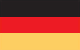


dk - Danish


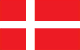


en - English


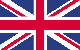


es - Spanish; Castilian


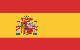


fi - Finnish


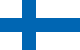


fr - French


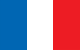


he - Hebrew


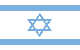


id - Indonesian


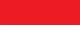


it - Italian


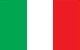


ja - Japanese


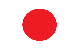


kn - Kannada


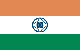


ko - Korean


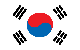


lt - Lithuanian


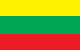


lv - Latvian


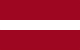


nl - Dutch; Flemish


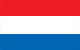


no - Norwegian


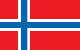


pl - Polish


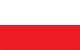


pt - Portuguese


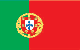


ro - Romanian; Moldavian; Moldovan


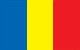


ru - Russian


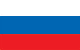


sl - Slovenian


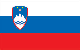


sr - Serbian


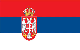


th - Thai


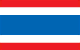


tr - Turkish


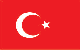


uk - Ukrainian


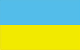


vi - Vietnamese


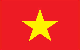

In [4]:
flags = {
    "ar": "https://www.worldometers.info/img/flags/sa-flag.gif",
    "cz": "https://www.worldometers.info/img/flags/ez-flag.gif",
    "de": "https://www.worldometers.info/img/flags/gm-flag.gif",
    "dk": "https://www.worldometers.info/img/flags/da-flag.gif",
    "en": "https://www.worldometers.info/img/flags/uk-flag.gif",
    "es": "https://www.worldometers.info/img/flags/sp-flag.gif",
    "fi": "https://www.worldometers.info/img/flags/fi-flag.gif",
    "fr": "https://www.worldometers.info/img/flags/fr-flag.gif",
    "he": "https://www.worldometers.info/img/flags/is-flag.gif",
    "id": "https://www.worldometers.info/img/flags/id-flag.gif",
    "it": "https://www.worldometers.info/img/flags/it-flag.gif",
    "ja": "https://www.worldometers.info/img/flags/ja-flag.gif",
    "ko": "https://www.worldometers.info/img/flags/ks-flag.gif",
    "lt": "https://www.worldometers.info/img/flags/lh-flag.gif",
    "lv": "https://www.worldometers.info/img/flags/lg-flag.gif",
    "nl": "https://www.worldometers.info/img/flags/nl-flag.gif",
    "no": "https://www.worldometers.info/img/flags/no-flag.gif",
    "pl": "https://www.worldometers.info/img/flags/pl-flag.gif",
    "pt": "https://www.worldometers.info/img/flags/po-flag.gif",
    "ro": "https://www.worldometers.info/img/flags/ro-flag.gif",
    "ru": "https://www.worldometers.info/img/flags/rs-flag.gif",
    "sl": "https://www.worldometers.info/img/flags/si-flag.gif",
    "sr": "https://www.worldometers.info/img/flags/ri-flag.gif",
    "th": "https://www.worldometers.info/img/flags/th-flag.gif",
    "tr": "https://www.worldometers.info/img/flags/tu-flag.gif",
    "uk": "https://www.worldometers.info/img/flags/up-flag.gif",
    "vi": "https://www.worldometers.info/img/flags/vm-flag.gif",
    # "kn-ce": "https://www.worldometers.info/img/flags/ce-flag.gif",
    # "kn-in": "https://www.worldometers.info/img/flags/in-flag.gif",
    # "kn-np": "https://www.worldometers.info/img/flags/np-flag.gif",
    # "kn-pk": "https://www.worldometers.info/img/flags/pk-flag.gif",
    "kn": "https://www.worldometers.info/img/flags/in-flag.gif",
}

for code in SUPPORTED_LANGS:
    url = flags[code]
    r = requests.get(url)
    im = Pim.open(BytesIO(r.content))
    b = BytesIO()
    im.resize((80, 50)).save(b, format="png")
    name = names[code]
    print(f"{code} - {name}")
    display(Image(b.getvalue(), format="png"))
    print()